In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

from src.visual_utils import plot_data_bar, plot_data_line, plot_data_line_multiple
from src.stats_utils import calculate_retention, print_basic_stats

In [2]:
files = glob.glob("data/raw/*.csv.gz")


dfs = [pd.read_csv(f, compression="gzip") for f in files]
df = pd.concat(dfs)
df["install_date"] = pd.to_datetime(df["install_date"])
df["event_date"] = pd.to_datetime(df["event_date"])

# Add a new column for later use.
df["days_after_install"] = (df["event_date"] - df["install_date"]).dt.days


In [ ]:
#df = pd.read_csv("data/raw/000000000000.csv.gz")
#df["install_date"] = pd.to_datetime(df["install_date"])
#df["event_date"] = pd.to_datetime(df["event_date"])

An interesting (maybe not so shocking) insight from the dataset is below:

X axis is days and y axis is daily active users.<br>
We can see from the bar chart that the players are significantly more active during 2 days of the week. And those days are Saturday and Sunday.

In [ ]:
daily_active_users = df.groupby("event_date")["user_id"].nunique()
x = daily_active_users.index
y = daily_active_users.values

plot_data_bar(x, y, 45)

In [ ]:
d1_retention = calculate_retention(df, 1)
d3_retention = calculate_retention(df, 3)
d7_retention = calculate_retention(df, 7)

x_values_list = [d1_retention.index, d3_retention.index, d7_retention.index]
y_values_list = [d1_retention.values, d3_retention.values, d7_retention.values]
labels = ["D1 retention", "D3 retention", "D7 retention"]

plot_data_line_multiple(x_values_list, y_values_list, labels, 45)

In [ ]:
session_duration_df = df.copy()

# The player who played the game before installing
session_duration_df[session_duration_df["days_after_install"] == -1]

In [ ]:
session_duration_df = df.copy()
tmp = session_duration_df.groupby("days_after_install").agg(
    total_session_duration=("total_session_duration", "sum"),
    total_session_count=("total_session_count", "sum")
)
tmp = tmp[tmp.index > 0][:100]

plot_data_line(tmp.index, tmp["total_session_count"], y_scale="linear")
plot_data_line(tmp.index, tmp["total_session_count"], y_scale="log")

# plot_data_line(tmp.index, tmp["total_session_duration"], y_scale="log")

In [3]:
engagement_df = df[df["days_after_install"] == 0]

segments = ["Low", "Medium", "High"]
engagement_df["segment"] = pd.qcut(
    engagement_df["total_session_duration"],
    q=3,
    labels=segments
)


df = df.merge(
    engagement_df[["user_id", "segment"]],
    on="user_id",
    how="left"
)

C:\Users\PC\AppData\Local\Temp\ipykernel_30452\2980248872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement_df["segment"] = pd.qcut(


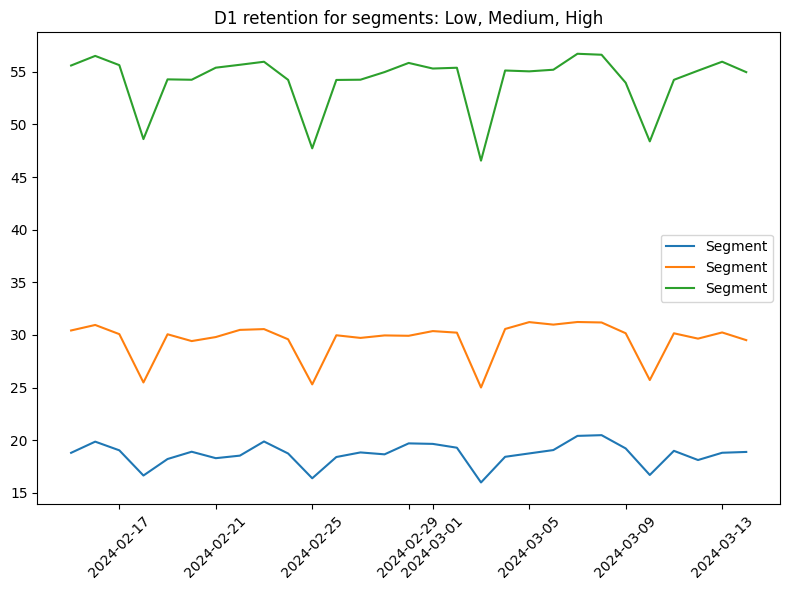

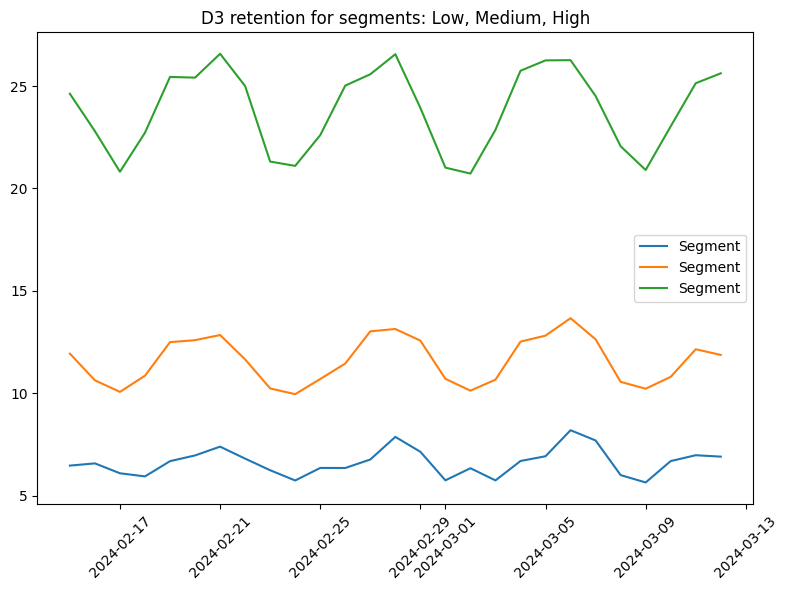

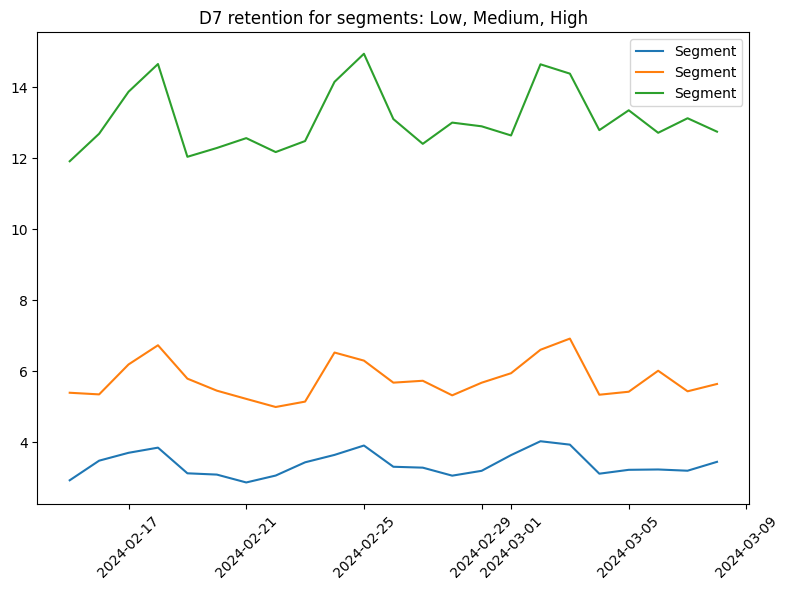

In [6]:
days_to_plot = [1, 3, 7]

for day_number in days_to_plot:
    x_values_list, y_values_list, labels = [], [], []
    for segment in segments:
        segment_df = df[df["segment"] == segment]

        retention = calculate_retention(segment_df, day_number)

        x_values_list.append(retention.index)
        y_values_list.append(retention.values)
        labels.append("Segment")

    title = f"D{day_number} retention for segments: {", ".join(segments)}"
    plot_data_line_multiple(x_values_list, y_values_list, labels, 45, plot_title=title)


In [ ]:
print_basic_stats(df["ad_revenue"], name="ad revenue")
print_basic_stats(df["iap_revenue"], name="iap_revenue")
print_basic_stats(df["total_session_count"], name="total_session_count")
print_basic_stats(df["total_session_duration"], name="total_session_duration")
print_basic_stats(df["victory_count"], name="victory_count")
print_basic_stats(df["defeat_count"], name="defeat_count")
print_basic_stats(df["match_start_count"], name="match_start_count")
print_basic_stats(df["match_end_count"], name="match_end_count")
print_basic_stats(df["server_connection_error"], name="server_connection_error")
print_basic_stats(df["days_after_install"], name="days_after_install")
